In [28]:
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
investors=pd.read_csv('BBVA_Investors.csv')
FDR=pd.read_csv('BBVA_Network_FDR.csv')
Bonferroni=pd.read_csv('BBVA_Network_Bonferroni.csv')
M=pd.read_csv('M.csv')

In [25]:
import pandas as pd

df = pd.read_csv('BBVA_Investors.csv', usecols=["investor_id", "position", "date"])

data = df[["investor_id", "position"]]
data=pd.concat([df['date'],data.groupby("investor_id")["position"].diff()], axis=1)
data

3154698.0


,date,position
0,2000-01-03,NaN
1,2000-01-04,0.0
2,2000-01-05,0.0
3,2000-01-07,0.0
4,2000-01-10,0.0
...,...,...
289438,2007-10-10,0.0
289439,2007-10-11,0.0
289440,2007-10-12,0.0
289441,2007-10-15,0.0


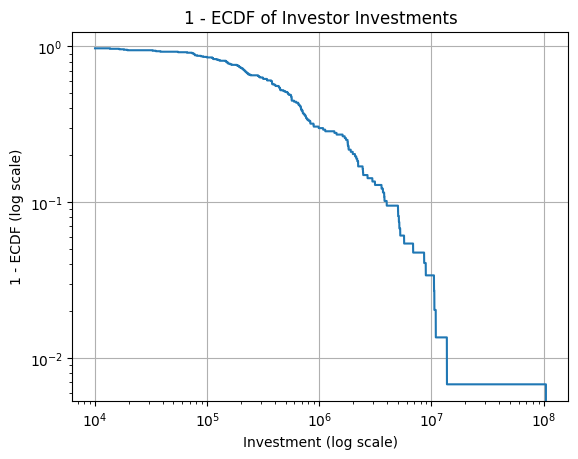

In [45]:


# Calculate the 1-ECDF for the investments

ecdf=ECDF(M.iloc[:,1])
plt.plot(np.linspace(1e4,max(M.iloc[:,1]),10000000),1-ecdf(np.linspace(1e4,max(M.iloc[:,1]),10000000)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Investment (log scale)')
plt.ylabel('1 - ECDF (log scale)')
plt.title('1 - ECDF of Investor Investments')
plt.grid(True)
plt.show()




In [46]:
import powerlaw

In [47]:
fit =powerlaw.Fit(1-ecdf(np.linspace(1e4,max(M.iloc[:,1]))))
print(fit.power_law.alpha)
print(fit.power_law.xmin)

Calculating best minimal value for power law fit
3.925160491748701%
0.006802721088435382


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [50]:
# Calculer le rendement quotidien
prices_data=pd.read_csv('BBVA_Prices.csv')
prices_data['return'] = prices_data['close'].pct_change()
investors_data=investors

# Joindre les données des investisseurs avec les rendements quotidiens
investors_data = investors_data.merge(prices_data[['date', 'return']], on='date', how='left')

# Calculer le changement d'inventaire pour chaque investisseur
investors_data['inventory_change'] = investors_data.groupby('investor_id')['position'].diff()

# Supprimer les lignes avec des valeurs manquantes
investors_data = investors_data.dropna()

# Calculer la corrélation pour chaque investisseur
investor_correlation = investors_data.groupby('investor_id').apply(lambda x: x['inventory_change'].corr(x['return']))

# Classer les investisseurs
def classify_investor(correlation):
    if correlation > 0:
        return 'trend-following'
    elif correlation < 0:
        return 'contrarian'
    else:
        return 'neutral'

investor_classification = investor_correlation.apply(classify_investor)

# Afficher la classification
investor_classification.head()

C:\Users\Périg\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Périg\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


investor_id
704     contrarian
744     contrarian
1312    contrarian
2236    contrarian
2300    contrarian
dtype: object